<a href="https://colab.research.google.com/github/jericgiron/AIDA-2/blob/main/GIRON_CORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 04.1: Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Now we are starting with the core machine learning topics. We will first try be acquainted with supervised learning specifically with statistical learning. In this notebook, we will be discussing the most fundamental algorithm in Data Science and Artificial Intelligence — Regression. Specifically we will cover the following topics:
* Linear Regression
* Least Squares
* Multiple Linear Regression


## 4.1 Correlation
Before dwelling into regression we must first lay the difference between correlation and causation. Regression specifically talks about the causality or the the cause and effect relationship of variables. Whereas correlation talks about how associated variables are.

![img](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fd35fo82fjcw0y8.cloudfront.net%2F2018%2F07%2F05092148%2Fcorrelation-vs-causation-phone-RAM1-1024x574.png&f=1&nofb=1)

In this example we can see a distinction from correlation and causation. There will be an association with messages failing to send and the freezing of your phone. You could say something:

* A: "I can't send messages whenever my phone freezes. and conversely:

* B: "My phone froze so I can't send messages.". 

A and B still make sense even if we switch up the logic. The statements could be symmetric! But if you try to put into a condition statement or implication it doesn't give much meaning. For example we could say: 

* C: "If my phone freezes I can't send messages." and

* D: "If I can't send messages, then my phone froze".

Now the two statements does not have same meaning. This is now a perspective of causality. One factor affecting the other. Now not all variables causes the other to happen. There would be times that there is an indirect relationship, and a hidden variable establishes the causality, we call this a **confounding variable**.



### 4.1.1 Covariance

Now let's acquainted with another statistic called covariance. The covariance tells us the relationship between variables in datasets. A positive covariance indicates that the varaibles are moving along the same direction or they are directly proportional while negative covariances tell us that these variables have inverse relationships. We can compute the covariance as:

$$\text{Cov}(X,Y) = \frac{1}{N}\sum^N_{i=0}(x_i-\bar{x})(y_i-\bar{y})\\_{\text{Eq. 4.1}}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

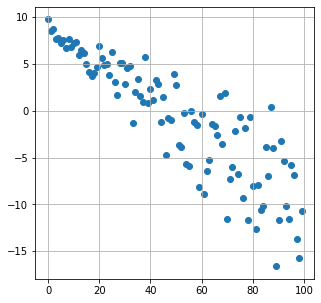

In [4]:
'''
Let's create dummy data showing positive and negative correlations
'''
def create_corr_data(n,is_neg=False):
  inv = -1 if is_neg else 1
  X = np.arange(0,n,1,dtype=np.float64) ## features
  m = inv*np.random.uniform(0.1,0.3,(n,)) ## weights
  b = np.random.uniform(8,10,(n,)) ## biases
  y = m*X+b  ## targets
  return X,y,m,b

n=100
X,y,_,_ = create_corr_data(n,is_neg=True)

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X,y)
plt.show()

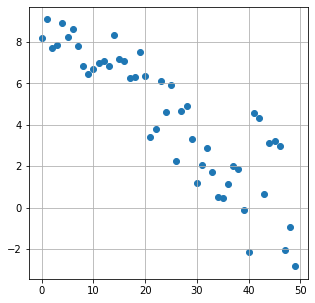

Covariance is: -40.24692255882071


In [52]:
## Coding covariances

### Prepare the dataset
n=50
X,y,_,_ = create_corr_data(n,is_neg=True)
## take the means of X and Y
x_bar = X.mean()
y_bar = y.mean()

## get the difference for each data point from their means
sst_x = X-x_bar
sst_y = y-y_bar

## compute for the covariance by Eq. 4.1
cov = np.mean(sst_x*sst_y)

plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X,y)
plt.show()
print(f'Covariance is: {cov}')

## Try to create a cov function that will dynamically ask users for two datasets

#### Variance-Covariance Matrix

Another useful matrix in statistics is the Variance-covariance matrix. This matrix shows the dispersion of each variable. It is easier to remember the format of the matrix as:
$$\begin{bmatrix} \text{Cov}(X,X) & \text{Cov}(X,y) \\
\text{Cov}(y,X) & \text{Cov}(y,y) \end{bmatrix}$$

For brevity it can be formally expressed as:
$$\begin{bmatrix} \sigma^2_X & \text{Cov}(X,y) \\
\text{Cov}(y,X) & \sigma^2_y\end{bmatrix}$$

In [53]:
## To get the covairance matrix we use np.cov
cov_mat = np.cov(X,y, bias=True) ## we tick the bias since we used a bias term

## We can then take cov(x,y) at the (0,1) position of a covariance matrix
cov_mat[0,1]

-40.2469225588207

### 4.1.2 Pearson Correlation
Another measure of relationship of datasets is the Pearson Correlation Coefficient or Pearson's R. Pearson's R is specifically a measure of linear correlation between data. It can be interpreted as the ratio between the covariances of the two variables and the product of their standard deviations.
$$r_{X,y} = \frac{\text{Cov(X,y)}}{\sigma_X \sigma_y} \\_{\text{Eq. 4.2}}$$

In [54]:
### Obtain a dataset
n=100
X,y,_,_ = create_corr_data(n,is_neg=False)

## Compute for cov(x,y)
cov_xy = np.cov(X,y, bias=True)[0,1]

## Get the st.dev of X and y
std_X = np.std(X)
std_y = np.std(y)

## Compute for Pearson's R
R = cov_xy / (std_X*std_y)
R

0.8848547329807197

Now you might wonder if you would use `np.corrcoeff()` it will be a different value. This is because we are using the general  form of Pearson's R for population. NumPy uses are more stable and more adaptable for samples. We will not cover it in this notebook but you if you want to know more you can read futher [here](http://statisticslectures.com/topics/pearsonr/).

$$\omega_1 = r\frac{\sigma_y}{\sigma_x}=\frac{\bar{y}*\sum(x_i^2)-\bar{x}\sum(x_i*y_i)}{\sum(x^2_i-n\bar{x}^2)}\\ _{\text{(Eq. 4.2.1)}}$$
$$\omega_0 =\bar{y}-\omega_1\bar{x}= \frac{\sum(x_i*y_i)-\bar{x}\sum(y_i)}{\sum(x^2_i-n\bar{x}^2)}\\ _{\text{(Eq. 4.2.2)}}$$

Whereas $r$ is the Pearson correlation solved as:
$$r = \frac{\sum((x-\bar{x})(y-\bar{y}))}{\sqrt{\sum(x-\bar{x})\sum(y-\bar{y})}}\\ _{\text{(Eq. 4.2.3)}}$$

In [55]:
np.corrcoef(X,y)

array([[1.        , 0.88485473],
       [0.88485473, 1.        ]])

## 4.2 Linear Regression
As the name suggests, linear regression tries to find the best fit straight line to a given dataset. This algorithm is one of the simplest yet most important alogorithm in regression since it is the foundation of many more complex regression techniques.

The goal of this algorithm is finding a linear equation that would best describe a set of data. The equation to be used in finding that linear equation is function is given as:
$$y = \omega_0 + \omega_1 X \\ _{\text{Eq. 4.3}}$$

Whereas $X$ is the dataset while $y$ is the corresponding values for each datapoint in $X$. The variable $\omega$ is called the weight of the dataset consiting of $\omega_0$ and $\omega_1$. In other literature, $\omega_0$ is called the bias term sometimes written as $b$. The following equations are used to solve for $\omega_0$ and $\omega_1$:
$$\omega_1 = r\frac{\sigma_y}{\sigma_x}\\ _{\text{Eq. 4.3.1}}$$
$$\omega_0 =\bar{y}-\omega_1\bar{x}\\ _{\text{Eq. 4.3.2}}$$

In [56]:
## Create a dataset
n=10
X,y,m,b = create_corr_data(n,is_neg=False)
w1_th = m.mean()
w0_th = b.mean()
## Compute for the std.dev of X and y
std_X, std_y = np.std(X), np.std(y)

## Compute for Pearson's R
rho = np.corrcoef(X,y)[0,1]

## Compute for the weights of the bias term
w1 = rho*(std_y/std_X)

## Compute for the weights of the feature
w0 = y.mean()-w1*X.mean()

print(f"Computed w0 is {w0}, theoretical @ {w0_th}")
print(f"Computed w1 is {w1}, theoretical @ {w1_th}")
print(f"Equation: y = {w1} X + {w0}")

Computed w0 is 8.984087287443748, theoretical @ 9.227125748606777
Computed w1 is 0.2335498047581293, theoretical @ 0.2001425312336988
Equation: y = 0.2335498047581293 X + 8.984087287443748


In [57]:
X

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

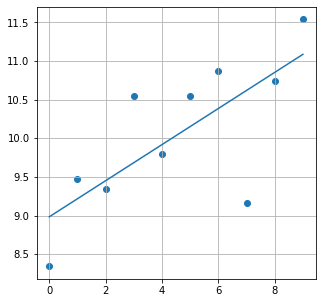

In [58]:
model = w0 + w1*X
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X,y)
plt.plot(X, model)
plt.show()

In [59]:
def predict(w0,w1,x):
  return w0+w1*x
predict(w0,w1,20)

13.655083382606334

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))
print(f"Weight of the feature is {model.coef_[0]}")
print(f"Bias of the model is {model.intercept_}")
print(f"Equation: y = {model.coef_[0]} X + {model.intercept_}")

Weight of the feature is [0.2335498]
Bias of the model is [8.98408729]
Equation: y = [0.2335498] X + [8.98408729]


### Metrics
Like any machine learning models we must determine their level of acceptance through measurements. The succeeding sections will cover on how to determine the error and accuracy of regression models

#### **Measures of Error**
Error or losses are computed to determine the robustness of a model to certain dataset. There are several ways to compute the error some of them are:
* Sum of Squares Total
* Sum of Squares Regression
* Sum of Squares Error
* Mean Squared Error
* Mean Absolute Error
* Mean Abosulute Percentage Error

##### *Sum of Squares Total*
The Sum of Squares Total or SST is a measure of the variability of dataset it is computed by:
$$SST = \sum_{i=0}^n(y_i-\bar{y})^2 \\_\text{Eq.4.3.3}$$

In [ ]:
def SST(y):
  return np.sum(np.square(y-y.mean()))

##### *Sum of Squares Regression*
The Sum of Squares Regression or SSR is a measure of the variability of the model it is computed by:
$$SSR = \sum_{i=0}^n(\hat{y_i}-\bar{y})^2 \\_\text{Eq.4.3.4}$$

In [ ]:
def SSR(y,y_hat):
  return np.sum(np.square(y_hat-y.mean()))

##### *Sum of Squares Error*
The Sum of Squares Regression or SSE is a measure of the variability of the model with respect to the residuals or its deviation from the ground truths, it is computed by:
$$SSE = \sum_{i=0}^n(\hat{y_i}-y_i)^2 \\_\text{Eq.4.3.5}$$

In [ ]:
def SSE(y,y_hat):
  return np.sum(np.square(y_hat-y))

##### *Mean of Squared Error*
The Mean Squared Error or MSE the name suggests it is the mean of the squared errors or SSE. It is the average error of a model. It is computed as:
$$MSE = \frac{1}{n}\sum_{i=0}^n(\hat{y_i}-y_i)^2 \\_\text{Eq.4.3.6}$$

In [ ]:
def MSE(y,y_hat):
  return np.mean(np.square(y_hat-y))

##### *Mean of Absolute Error*
The Mean Absolute Error or MAE, is another error measurement between the model and the ground truths but uses the Manhattan distance instead of the Euclidean distance from SSE.
$$MAE = \frac{1}{n}\sum_{i=0}^n|\hat{y_i}-y_i| \\_\text{Eq.4.3.7}$$

In [ ]:
def MAE(y,y_hat):
  return np.mean(np.abs(y_hat-y))

##### *Mean of Absolute Percentage Error*
The Mean Absolute Percentage Error or MAPE, is another error measurement derived from MAE but this time the error normalized. It is computed as:
$$MAPE = \frac{100\%}{n}\sum_{i=0}^n|\frac{\hat{y_i}-y_i}{y_i}| \\_\text{Eq.4.3.8}$$

In [ ]:
def MAPE(y,y_hat):
  return 100*np.mean(np.abs((y_hat-y)/y))

##### *Root Mean Squared Error*
The Root Mean Squared Error or RMSE, is the root of the RMSE which brings it back to its actual unit. It is computed as:
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=0}^n(\hat{y_i}-y_i)^2} \\_\text{Eq.4.3.9}$$

#### Measures Accuracy
We measure the accuracy of the regression through its explainability. We measure it through the R-squared or the Adjusted R-squared.

#### *R-squared*
The R-squared is a statistical measurement also known as the coefficient of determination wherein it shows the explanatory power of the variables used in the model. It is computed by:

$$R^2 = 1 - \frac{SSE}{SST}\\_\text{Eq.4.3.10}$$


#### *Adjusted R-squared*
The Adjusted R-squared is another statistical measurement for detemrinign the explanatory power of a model. Unlike, R-squared it is adjusted accordingly to the total datapoints and the features involved in the computation. It is computed by:

$$Adj. R^2 = 1 - \frac{SSE}{SST}\cdot \frac{n-1}{n-k-1} = 1 - \frac{(1-R^2)(n-1)}{n-k-1}\\_\text{Eq.4.3.10}$$

Whereas $n$ is the total number of datapoints in the dataset and $k$ is the total number of features to be used in the regression.

## 4.3 Least Squares
The least squares method is an optimization alogrithm in finding the best fit line for a given dataset. Just like with any numerical technique it utilizes iterations to mimimize the error.


### 4.3.1 Iteration Method
The main idea of the iteration method is to iteratively fit a line to the dataset. We tend to guess iteratively whether the line we are fitting is right. With this we can call the line the we are going to fit as the hypothesis or $h_\theta$ we can then compute the $h_\theta$ for this linear regression problem as:
$$h_\theta = \theta X+b \\_\text{Eq.4.4.1}$$
Whereas $X$ is the feature vector, $b$ is the bias vector, and $\theta$ is the weight vector  of the features. We then determine whether our hypothesis is correct by determining its error. Its error is determined by the Sum of Squared Error or SSE. We compute the SSE as the sum of the distances of each hypothesis $h_\theta$ to the target $y$. We denote the SSE as the loss function of this optimization problem, we denote it as $J(\theta)$.
$$J(\theta) =  \sum(h_\theta - y)^2\\_\text{Eq.4.4.2}$$
We then delare the optimization goal for this problem as to minimize the loss function:
$$\min(J)\\_\text{Eq.4.4.3}$$

In [62]:
## Create a Dataset
n=30
X,y,_,_ = create_corr_data(n,is_neg=False)

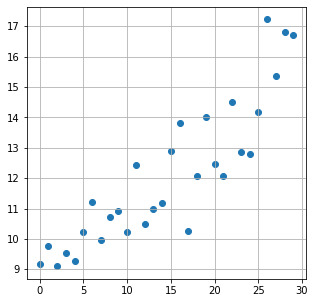

In [63]:
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(X,y)

In [64]:
## Modelling optimization routine using first iteration
## initialize optimization variables
def init_linear_reg(X,y):
  theta = 0 ##angle is 0
  b = 8.6
  h = theta*X + b
  return theta,b, h
theta, b, h = init_linear_reg(X,y)

In [65]:
def SSE(h,y):
  return np.sum(np.square(h-y))
J = SSE(h,y)
J

529.5999101186297

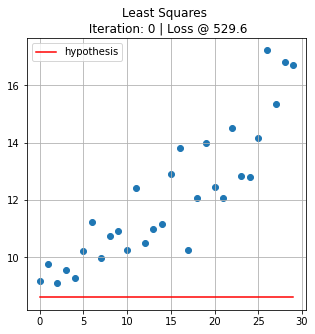

In [66]:
def disp_hypothesis(X,y,h,loss,iter):
  plt.figure(figsize=(5,5))
  plt.title(f"Least Squares \n Iteration: {iter} | Loss @ {round(loss,3)}")
  plt.grid()
  plt.scatter(X,y)
  plt.plot(h, color='red', label='hypothesis')
  plt.legend()
  plt.show()
disp_hypothesis(X,y,h,J,0)

In [67]:
## Design the optimization iterations
### set the range and steps
min, max = -100, 100
steps = 1
iters = np.arange(min,max+steps,steps)

### do a sanity check for the loop
# for iter in iters:
#   print(iter)

In [68]:
## initialize the optimization routing
print("[INFO] Initializing Linear Regression parameters...")
theta, b, h = init_linear_reg(X,y)
print("[INFO] Initialization done!")

## create logs for optimization backtracking
history = {
    'epoch': [],
    'theta': [],
    'model': [],
    'loss': []
}
print("[INFO] Starting optimzation...")
for iter in iters:
  ## set the angle as the normalized ratio of the iter to max
  theta = iter/max
  ## compute for the hypothesis
  h = theta*X + b
  ## compute for the loss
  J = SSE(h,y)

  ## log the changes
  history['epoch'].append(iter)
  history['theta'].append(theta)
  history['model'].append(h)
  history['loss'].append(J)
  print(f"[INFO] Epoch {iter} | Loss: {J}")

[INFO] Initializing Linear Regression parameters...
[INFO] Initialization done!
[INFO] Starting optimzation...
[INFO] Epoch -100 | Loss: 13202.24515734094
[INFO] Epoch -99 | Loss: 12990.824204868717
[INFO] Epoch -98 | Loss: 12781.114252396495
[INFO] Epoch -97 | Loss: 12573.115299924271
[INFO] Epoch -96 | Loss: 12366.827347452048
[INFO] Epoch -95 | Loss: 12162.250394979825
[INFO] Epoch -94 | Loss: 11959.384442507599
[INFO] Epoch -93 | Loss: 11758.22949003538
[INFO] Epoch -92 | Loss: 11558.785537563159
[INFO] Epoch -91 | Loss: 11361.052585090933
[INFO] Epoch -90 | Loss: 11165.03063261871
[INFO] Epoch -89 | Loss: 10970.719680146489
[INFO] Epoch -88 | Loss: 10778.119727674262
[INFO] Epoch -87 | Loss: 10587.23077520204
[INFO] Epoch -86 | Loss: 10398.052822729816
[INFO] Epoch -85 | Loss: 10210.585870257592
[INFO] Epoch -84 | Loss: 10024.82991778537
[INFO] Epoch -83 | Loss: 9840.784965313147
[INFO] Epoch -82 | Loss: 9658.451012840924
[INFO] Epoch -81 | Loss: 9477.828060368702
[INFO] Epoch -80

In [69]:
hists_df = pd.DataFrame(history)
hists_df

,epoch,theta,model,loss
0,-100,-1.00,"[8.6, 7.6, 6.6, 5.6, 4.6, 3.5999999999999996, ...",13202.245157
1,-99,-0.99,"[8.6, 7.609999999999999, 6.619999999999999, 5....",12990.824205
2,-98,-0.98,"[8.6, 7.619999999999999, 6.64, 5.66, 4.68, 3.6...",12781.114252
3,-97,-0.97,"[8.6, 7.63, 6.66, 5.6899999999999995, 4.72, 3....",12573.115300
4,-96,-0.96,"[8.6, 7.64, 6.68, 5.72, 4.76, 3.8, 2.84, 1.88,...",12366.827347
...,...,...,...,...
196,96,0.96,"[8.6, 9.559999999999999, 10.52, 11.48, 12.44, ...",4460.948473
197,97,0.97,"[8.6, 9.57, 10.54, 11.51, 12.48, 13.45, 14.42,...",4584.883520
198,98,0.98,"[8.6, 9.58, 10.559999999999999, 11.54, 12.52, ...",4710.529568
199,99,0.99,"[8.6, 9.59, 10.58, 11.57, 12.559999999999999, ...",4837.886615


Text(0, 0.5, 'Loss')

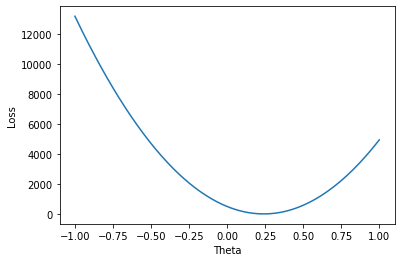

In [70]:
plt.plot(hists_df['theta'], hists_df['loss'])
plt.xlabel('Theta')
plt.ylabel('Loss')

In [71]:
### gets the index of the least error
hists_df['loss'].idxmin()
### retrieve the theta of the least error
hists_vals = hists_df.iloc[hists_df['loss'].idxmin()]
hists_vals['theta']

0.24

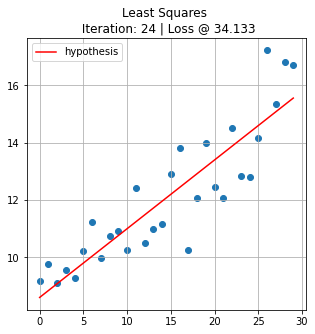

In [72]:
## Plotting
model = hists_vals['theta']*X +b
disp_hypothesis(X,y,hists_vals['model'], hists_vals['loss'], hists_vals['epoch'])

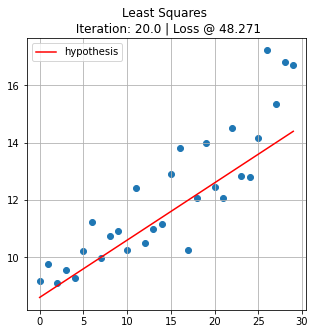

In [73]:
epoch = 20
vals = hists_df.loc[hists_df['epoch']==epoch]
disp_hypothesis(X,y,vals['model'].iloc[0],
                float(vals['loss']), 
                float(vals['epoch']))

## 4.4 Multiple Linear Regression 
Multiple linear regression, as the name suggests uses more linear regressors in the algorithm. This can be used if there are more than one features to a dataset. The MLR can be formulated as:
$$y = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + ... + \omega_n x_n \\ _{\text{(Eq. 4.5.1)}}$$
Whereas $\omega_0$ is the bias term while $\omega_n$ are the weights or slopes of the features $x_n$. The simplest way to implement an MLR algorithm is looping over each feature and their dataset and compute the corresponding weights. In this course, we are going to implement vectorization in implementing MLR. So instead of hte linear equation in Eq. 4.4 we can re-form the equation to the matrix equation:
$$y = \omega X^T$$
Whereas $\omega$ is a vector that includes all the weights of the features $\begin{bmatrix}\omega_0 \\ \omega_1 \\ \omega_2 \\ \vdots \\ \omega_n\end{bmatrix}$. While $X$ are the data of each feature vector $\begin{bmatrix}1\\ x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix}$.

We will use the **Normal Equation** in solving MLR. The Normal equation uses the Least-Squares Cost function and is formulated as:
$$\theta = (X^TX)^{-1}X^Ty \\ _{\text{(Eq. 4.5.2)}}$$
Whereas $\theta$ is the hypothesis or model to be created while $X$ represents the data vector and $y$ represents the labels or values corresponding to the data vector. The term $(X^TX)^{-1}$ is called the **pseudoinverse** or the **Moore-Penrose** matrix. The pseudoinverse of a matrix term of Eq. 4.5 assures that the data are normal or orthogonal. This helps check the property of Autocorrelation between the features of the data. The other properties of datasets that are safe for linear regression are Homoscedasticity, Non-multicollinearity, and Non-endogeneity. 

In [74]:
import numpy as np


satisfaction = np.array([4, 2, 3, 5, 1, 5, 4, 5, 3])
motivation = np.array([3, 2, 3, 3, 1, 4, 3, 4, 3])
study_time = np.array([8, 8, 7, 10, 5, 9,10, 9, 7])

grades =  np.array([100, 98, 89, 78, 62, 80, 88, 90, 75])
bias = np.ones(grades.shape)

In [75]:
X = np.array([
    satisfaction,
    motivation,
    study_time,
    bias
])
y = grades.reshape(-1,1)
y.shape

(9, 1)

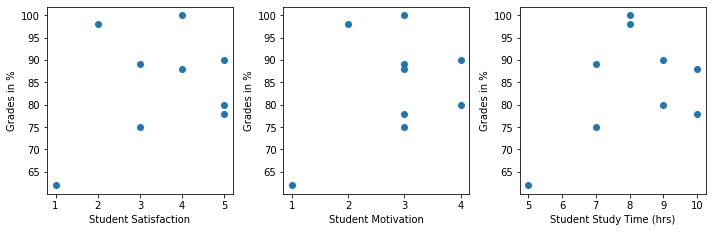

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3.33))

ax[0].scatter(X[0],y)
ax[0].set_xlabel("Student Satisfaction")
ax[0].set_ylabel("Grades in %")

ax[1].scatter(X[1],y)
ax[1].set_xlabel("Student Motivation")
ax[1].set_ylabel("Grades in %")

ax[2].scatter(X[2],y)
ax[2].set_xlabel("Student Study Time (hrs)")
ax[2].set_ylabel("Grades in %")

plt.tight_layout()
plt.show()

In [77]:
X_train = X.T
X_dot = X_train.T @ X_train
pseudoinv = np.linalg.inv(X_dot)
y_dot = X @ y
theta = pseudoinv @ y_dot
theta

array([[-11.35140562],
       [ 12.46385542],
       [  6.78714859],
       [ 33.74698795]])

In [78]:
w0 = theta[-1]
w1 = theta[0]
w2 = theta[1]
w3 = theta[2]

$$y = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3$$
$$y = 33.75 - 11.35x_1+12.46x_2+6.70x_4$$

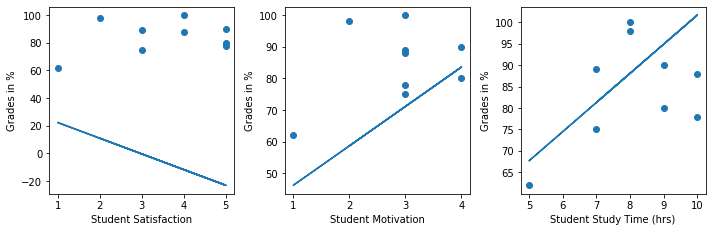

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3.33))

ax[0].scatter(X[0],y)
y_1 = w1*X[0]+w0
ax[0].plot(X[0], y_1)
ax[0].set_xlabel("Student Satisfaction")
ax[0].set_ylabel("Grades in %")

ax[1].scatter(X[1],y)
y_2 = w2*X[1]+w0
ax[1].plot(X[1], y_2)
ax[1].set_xlabel("Student Motivation")
ax[1].set_ylabel("Grades in %")

ax[2].scatter(X[2],y)
y_3 = w3*X[2]+w0
ax[2].plot(X[2], y_3)
ax[2].set_xlabel("Student Study Time (hrs)")
ax[2].set_ylabel("Grades in %")

plt.tight_layout()
plt.show()

In [80]:
np.corrcoef(X[1],y.flatten(), bias=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


array([[1.        , 0.36543536],
       [0.36543536, 1.        ]])

In [81]:
def train(X,y):
  X_train = X.T
  pseudoinv = np.linalg.inv(X_train.T @ X_train)
  y_dot = X @ y
  theta = pseudoinv @ y_dot
  return theta

In [82]:
def predict(w, X):
  preds = []
  prod = lambda x, w: w*x 
  for i in range(X.shape[0]):
    feature_sum = 0
    for j in range(X.shape[1]):
      feature_sum += prod(w[j], X[i][j])
    preds.append(feature_sum)
  return np.array(preds)  

In [83]:
X_test = np.array([
                   [4,4,11,1],
                   [3,5,10,1],
])

In [84]:
theta = train(X,y)
predict(theta,X_test)

array([[112.85542169],
       [129.88353414]])

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.T,y)

LinearRegression()

In [86]:
model.coef_

array([[-11.35140562,  12.46385542,   6.78714859,   0.        ]])

In [87]:
model.intercept_

array([33.74698795])

#ACTIVITY

##GIRON, JERIC S.<BR>
##201913397


In [99]:
import pandas as pd


movies = pd.read_csv("/content/movie_metadata_cleaned.csv")
print(movies)

      Unnamed: 0                                        movie_title  color  \
0              0                                            Avatar   Color   
1              1          Pirates of the Caribbean: At World's End   Color   
2              2                                           Spectre   Color   
3              3                             The Dark Knight Rises   Color   
4              4  Star Wars: Episode VII - The Force Awakens    ...      0   
...          ...                                                ...    ...   
5039        5039                         The Following               Color   
5040        5040                              A Plague So Pleasant   Color   
5041        5041                                  Shanghai Calling   Color   
5042        5042                                 My Date with Drew   Color   
5043        5043                                Starting Over Again      0   

          director_name  num_critic_for_reviews  duration  \
0 

In [44]:
for col in movies.columns:
    print(col)

Unnamed: 0
movie_title
color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


#1. Is the no. of facebook likes in Director's Facebook page matters to the gross sales of the movie?

# Answer: <br>
###The number of Facebook likes on the director's page affects the movie's gross sales because when the number of likes on the director's page rises, the movie's gross also changes at the same time because the gross covariance result from the statistics is a positive value.

In [88]:
movies.loc[:,["director_facebook_likes","gross"]]

,director_facebook_likes,gross
0,0.0,760505847.0
1,563.0,309404152.0
2,0.0,200074175.0
3,22000.0,448130642.0
4,131.0,0.0
...,...,...
5039,0.0,0.0
5040,0.0,0.0
5041,0.0,10443.0
5042,16.0,85222.0


In [89]:
likes = movies.loc[:,'director_facebook_likes']
gross = movies.loc[:,'gross']
cov = likes.cov(gross).astype(int)
print(f"The covariance of the Director's facebook likes to gross is: {cov}")

The covariance of the Director's facebook likes to gross is: 27085682274


# 2. What is the correlation , is it negative or positive correlation? Show your graph?

# Answer <br>
###Since the result value of the Director's Facebook likes and gross is 0.15, there is a positive correlation.

In [90]:
correlation = movies["director_facebook_likes"].corr(movies["gross"],method='pearson', min_periods=1).round(2)
print(f"The correlation of Director's facebook likes and gross is: {correlation}")

The correlation of Director's facebook likes and gross is: 0.15


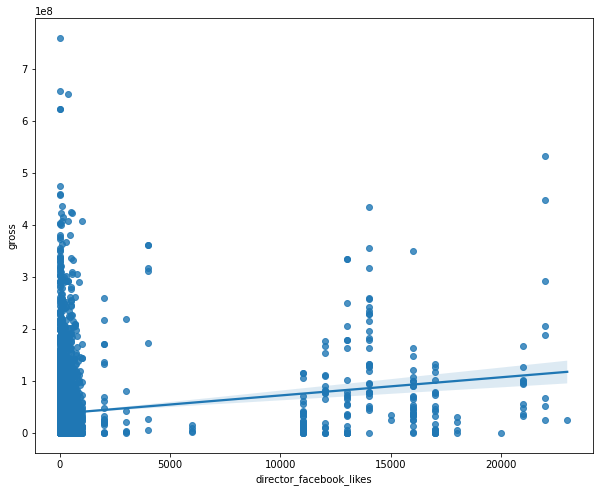

In [100]:
plt.figure(figsize=(10,8))
sns.regplot(x= movies["director_facebook_likes"], y= movies["gross"], marker='o')

<function matplotlib.pyplot.show(*args, **kw)>

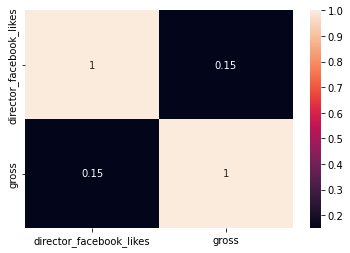

In [102]:
correlation = movies[['director_facebook_likes','gross']].corr()
sns.heatmap(correlation, annot=True)
plt.show

# 3. Does the plot of the movie dependent to budget? Show the positive and negative correlation if there is?

#Answer <br>
###Yes, the movie's budget has an impact on the plot.

In [105]:
plot = movies["plot_keywords"]=movies["plot_keywords"].astype('category').cat.codes
plot


0       1319
1       4282
2       2079
3       3483
4          0
        ... 
5039    3340
5040       0
5041       0
5042     403
5043       0
Length: 5044, dtype: int16

In [108]:
movies["plot_keywords"]=movies["plot_keywords"].astype('category').cat.codes
correlation_spear = movies["plot_keywords"].corr(movies["budget"],method='spearman', min_periods=1).round(2) #spearman
correlation_pear = movies["plot_keywords"].corr(movies["budget"],method='pearson', min_periods=1).round(3) #pearson
print(f"The correlation of movie's plot and budget using Spearson Correlation is: {correlation_spear}")
print(f"The correlation of movie's plot and budget using Pearson Correlation is: {correlation_pear}")

The correlation of movie's plot and budget using Spearson Correlation is: -0.02
The correlation of movie's plot and budget using Pearson Correlation is: 0.002


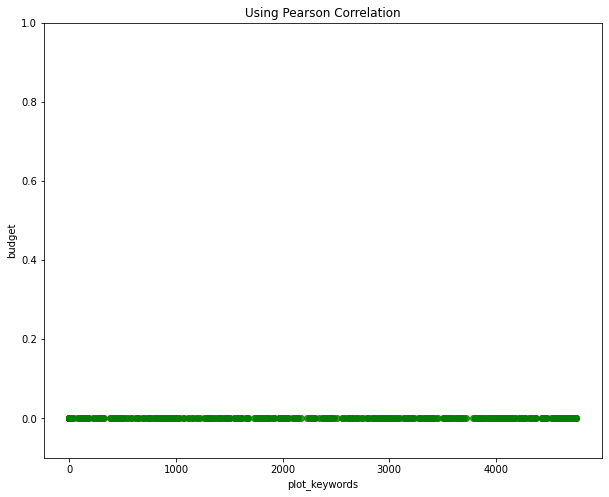

In [112]:
plt.figure(figsize=(10,8))
plt.ylim(-0.1,1)
plt.title("Using Pearson Correlation")
sns.regplot(x= movies["plot_keywords"], y= movies["budget"], marker ='o', color = 'green')

<function matplotlib.pyplot.show(*args, **kw)>

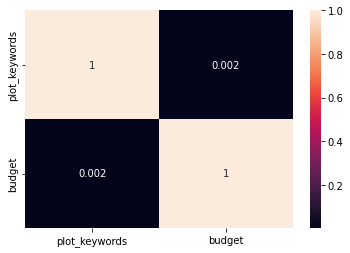

In [113]:
movies["plot_keywords"]=movies["plot_keywords"].astype('category').cat.codes
correlation_pear = movies[['plot_keywords','budget']].corr(method = 'pearson', min_periods=1)
sns.heatmap(correlation_pear, annot=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

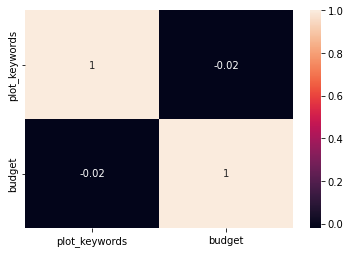

In [116]:
movies["plot_keywords"]=movies["plot_keywords"].astype('category').cat.codes
correlation_spear = movies[['plot_keywords','budget']].corr(method = 'spearman', min_periods=1).round(2)
sns.heatmap(correlation_spear, annot=True)
plt.show